In [ ]:
!pip install emnist


Epoch 1/10
5699/5700 [============================>.] - ETA: 0s - loss: 0.5802 - accuracy: 0.8292
Epoch 1: val_loss improved from inf to 0.27465, saving model to mnist_model.h5
5700/5700 [==============================] - 316s 55ms/step - loss: 0.5802 - accuracy: 0.8292 - val_loss: 0.2746 - val_accuracy: 0.9111
Epoch 2/10
   1/5700 [..............................] - ETA: 4:15 - loss: 0.2679 - accuracy: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5700/5700 [==============================] - ETA: 0s - loss: 0.3579 - accuracy: 0.8896
Epoch 2: val_loss improved from 0.27465 to 0.24555, saving model to mnist_model.h5
5700/5700 [==============================] - 305s 54ms/step - loss: 0.3579 - accuracy: 0.8896 - val_loss: 0.2455 - val_accuracy: 0.9208
Epoch 3/10
5700/5700 [==============================] - ETA: 0s - loss: 0.3136 - accuracy: 0.9019
Epoch 3: val_loss improved from 0.24555 to 0.22993, saving model to mnist_model.h5
5700/5700 [==============================] - 307s 54ms/step - loss: 0.3136 - accuracy: 0.9019 - val_loss: 0.2299 - val_accuracy: 0.9245
Epoch 4/10
5699/5700 [============================>.] - ETA: 0s - loss: 0.2918 - accuracy: 0.9083
Epoch 4: val_loss improved from 0.22993 to 0.22773, saving model to mnist_model.h5
5700/5700 [==============================] - 308s 54ms/step - loss: 0.2918 - accuracy: 0.9083 - val_loss: 0.2277 - val_accuracy: 0.9270
Epoch 5/10
5700/5700 [==============================] - ETA:

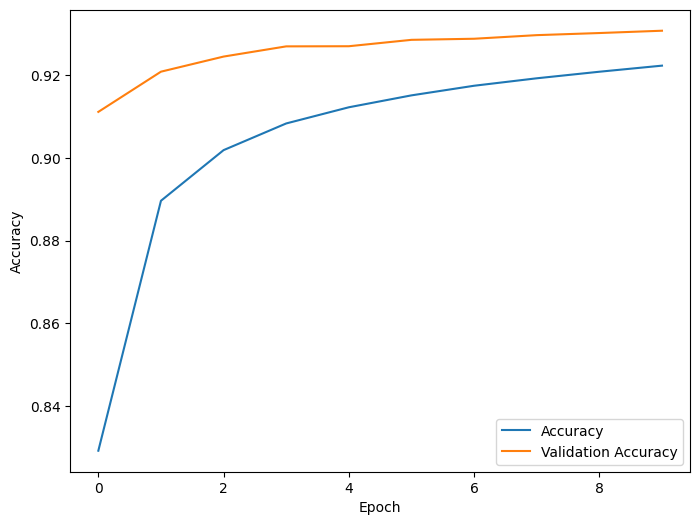

In [ ]:
from emnist import extract_training_samples, extract_test_samples
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# Load EMNIST data for letters and digits
X_train_letters, y_train_letters = extract_training_samples('letters')
X_test_letters, y_test_letters = extract_test_samples('letters')

X_train_digits, y_train_digits = extract_training_samples('digits')
X_test_digits, y_test_digits = extract_test_samples('digits')

# Concatenate the data
X_train = np.concatenate((X_train_letters, X_train_digits), axis=0)
y_train = np.concatenate((y_train_letters, y_train_digits + 26), axis=0)  # Add 26 to digit labels to avoid overlap

X_test = np.concatenate((X_test_letters, X_test_digits), axis=0)
y_test = np.concatenate((y_test_letters, y_test_digits + 26), axis=0)

# Reshape and preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# One-hot encode the labels
num_classes = 36  # 26 letters + 10 digits
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('mnist_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
